<div id="divCheckbox" style="display: none;">
"20102020"[::-1]
</div>

## 3.4 Housefly Data
Dataset Source:  Sokal, R.R. and F.J. Rohlf, 1968. Biometry, Freeman Publishing Co., p 109.  Original data from Sokal, R.R. and P.E. Hunter. 1955. A morphometric analysis of DDT-resistant and non-resistant housefly strains Ann. Entomol. Soc. Amer. 48: 499-507.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
data = pd.read_csv("HouseflyData.csv")

In [131]:
data.head(10)

,HouseflyWingLength,Frequency
0,20,1
1,21,1
2,22,1
3,23,1
4,24,1
5,25,1
6,26,1
7,27,1
8,28,1
9,29,1


In [132]:
data.tail(10)

,HouseflyWingLength,Frequency
31,51,6
32,52,5
33,53,5
34,54,4
35,55,3
36,56,2
37,57,2
38,58,2
39,59,1
40,60,1


In [133]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   HouseflyWingLength  41 non-null     int64
 1   Frequency           41 non-null     int64
dtypes: int64(2)
memory usage: 784.0 bytes
None


In [136]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively.

In [137]:
# Calculate statistics
log_mean = data.mean().apply(np.log)
mean_log = data.apply(np.log).mean()

Now we use our `newton` function to find the value of $\alpha$ for which $$\frac{\partial log(l)(\alpha,\beta)}{\partial \alpha} = 0$$

In [138]:
# Alpha MLE
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

1.369151037988914

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [139]:
beta_mle = alpha_mle/data.mean()[-1]
beta_mle

0.3171479805511044

We can compare the fit of the estimates derived from MLE to those from our method of moments (MOM):

In [140]:
data_mean = data.mean()
data_mean

data_var = data.var()
data_var

alpha_mom = data_mean ** 2 / data_var
beta_mom = data_var / data_mean
alpha_mom, beta_mom

(HouseflyWingLength    11.149826
 Frequency              1.265941
 dtype: float64,
 HouseflyWingLength    3.587500
 Frequency             3.410169
 dtype: float64)

Let's plot both models and compare:

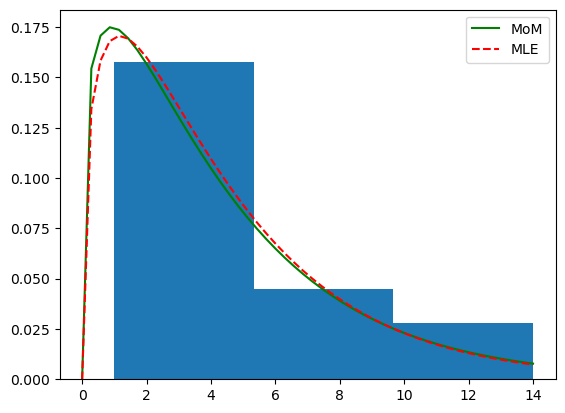

In [232]:
from scipy.stats.distributions import gamma

frequency = data.Frequency
frequency.hist(density=True, bins=3, grid=False)
x = np.linspace(0, frequency.max())
plt.plot(x, gamma.pdf(x, a=alpha_mom[1], scale=beta_mom[1]), 'g-', label = "MoM")
plt.plot(x, gamma.pdf(x, a=alpha_mle, scale=1/beta_mle), 'r--', label = "MLE")

plt.legend(loc = "upper right")

Ooooooh... The red dotted curve is a *better model* of our data than the continuous mauve (purple) curve. So MLE gives us a ***better model*** than MOM!

For common distributions, `SciPy` includes methods for fitting via MLE, if you assume a certain pdf:

In [229]:
from scipy.stats import gamma

gamma.fit(data.Frequency)

(0.34351928195696335, 0.9999999999999998, 2.5192046625155684)